# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find the best location for a office building. Specifically, this will be targeted to audiences interested in opening an **office** in **New York City**, USA.

Since the office space is to promote Korea Tourism and culture to domestic/international tourists visiting New York City with exhibition space, K-drama and K-pop concert hall, It will be opened nearby **the places where most tourists are visited** and have more **numbers of attractions**. 

We use the data visualization and machine learning for the prediction of future visitors and best neighborhood. Based on the data analysis and machine learning the con and pro of best possible final location will be delivered to the decision makers.

## Data <a name="data"></a>

Data to be used to tackle the problem:
* Demographics of New York City: Population, Gross Domestic Product and Gross Domestic Product per capita of year 2019
* Tourism in New York City – Visitors data: Domestic/International visitors with visitor spending from year 1991 thru 2018
* Tourism in New York City – Most visited attractions: name, numbers of visitors and locations of most visited attractions visited with 2MM visitors
* NYC neighborhoods: 5 boroughs and 306 neighborhoods with the latitude and longitude
* All attractions in NYC: Foursquare API conjunction with neighborhoods’ coordinates above

We will just focus on **Manhattan** borough for consideration of this project.

Let's start to get the data first.

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Demographics of New York City: Population, Gross Domestic Product and Gross Domestic Product per capita of year 2019

Data Cleaning
* Rename columns
* Drop the columns that not used for this project

In [2]:
# read html date from wiki into pandas dataframe
page = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_New_York_City')
df_demo = pd.DataFrame(page[0])
df_demo.head()

New York City's five boroughsvte                                \
                      Jurisdiction                    Population   
                           Borough    County Estimate (2019)[12]   
0                        The Bronx     Bronx             1418207   
1                         Brooklyn     Kings             2559903   
2                        Manhattan  New York             1628706   
3                           Queens    Queens             2253858   
4                    Staten Island  Richmond              476143   

                                                                \
  Gross Domestic Product                    Land area            
       billions(US$)[13] per capita(US$) square miles squarekm   
0                 42.695           30100        42.10   109.04   
1                 91.559           35800        70.82   183.42   
2                600.244          368500        22.83    59.13   
3                 93.310           41400       108.53   281.09   
4                 14.514           30500        58.37   151.18   

                                 
           Density               
  persons / sq. mi persons /km2  
0            33867        13006  
1            36147        13957  
2            71341        27544  
3            20767         8018  
4             8157         3150

In [3]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
(New York City's five boroughsvte, Jurisdiction, Borough)                        8 non-null object
(New York City's five boroughsvte, Jurisdiction, County)                         8 non-null object
(New York City's five boroughsvte, Population, Estimate (2019)[12])              8 non-null object
(New York City's five boroughsvte, Gross Domestic Product, billions(US$)[13])    8 non-null object
(New York City's five boroughsvte, Gross Domestic Product, per capita(US$))      8 non-null object
(New York City's five boroughsvte, Land area, square miles)                      8 non-null object
(New York City's five boroughsvte, Land area, squarekm)                          8 non-null object
(New York City's five boroughsvte, Density, persons / sq. mi)                    8 non-null object
(New York City's five boroughsvte, Density, persons /km2)                        8 non-null object
dtypes: o

In [4]:
# rename the column
df_demo.columns = ['Borough', 'County', 'Population', 'GDP_billions_US$', 'GDP_per_capita', 'Land_sq_miles' , 'Land_sq_km', 'Density_per_sq_miles','Density_per_sq_km']
df_demo.head()

,Borough,County,Population,GDP_billions_US$,GDP_per_capita,Land_sq_miles,Land_sq_km,Density_per_sq_miles,Density_per_sq_km
0,The Bronx,Bronx,1418207,42.695,30100,42.10,109.04,33867,13006
1,Brooklyn,Kings,2559903,91.559,35800,70.82,183.42,36147,13957
2,Manhattan,New York,1628706,600.244,368500,22.83,59.13,71341,27544
3,Queens,Queens,2253858,93.310,41400,108.53,281.09,20767,8018
4,Staten Island,Richmond,476143,14.514,30500,58.37,151.18,8157,3150


In [98]:
df_demo.drop(df_demo.columns[5:9], axis=1, inplace=True)
df_demo.head()

,Borough,County,Population,GDP_billions_US$,GDP_per_capita
0,The Bronx,Bronx,1418207,42.695,30100
1,Brooklyn,Kings,2559903,91.559,35800
2,Manhattan,New York,1628706,600.244,368500
3,Queens,Queens,2253858,93.310,41400
4,Staten Island,Richmond,476143,14.514,30500


### Tourism in New York City – Visitors data: Domestic/International visitors with visitor spending from year 1991 thru 2018

Data Cleaning
* Check Null in the columns
* 1 NaN value in the column- TotalVisitorSpendingBillions(US$)
* Replace the NaN value using mean of values from one row before and after

In [6]:
# read html date from wiki into pandas dataframe
page = pd.read_html('https://en.wikipedia.org/wiki/Tourism_in_New_York_City')
df_visitor = pd.DataFrame(page[0])
df_visitor.head()

,Year,TotalVisitors(millions),DomesticVisitors,InternationalVisitors,TotalVisitorSpendingBillions(US$)
0,1991,29.1,23.6,5.5,10.1
1,1995,28.5,23.1,5.4,11.7
2,1998,33.1,27.1,6.0,14.7
3,1999,36.4,29.8,6.6,15.6
4,2000,36.2,29.4,6.8,17.0


In [7]:
df_visitor.isnull().sum()
#df_visitor.tail()

Year                                 0
TotalVisitors(millions)              0
DomesticVisitors                     0
InternationalVisitors                0
TotalVisitorSpendingBillions(US$)    1
dtype: int64

In [8]:
df_visitor.tail()

,Year,TotalVisitors(millions),DomesticVisitors,InternationalVisitors,TotalVisitorSpendingBillions(US$)
18,2014,54.4,42.5,11.9,41.2
19,2015,55.9,43.2,12.7,42.3
20,2016,60.5,47.8,12.7,43.0
21,2017,62.8,49.7,13.1,NaN
22,2018,65.2,51.6,13.5,44.0


In [9]:
df_visitor = (df_visitor.ffill()+df_visitor.bfill())/2
df_visitor.tail()

,Year,TotalVisitors(millions),DomesticVisitors,InternationalVisitors,TotalVisitorSpendingBillions(US$)
18,2014.0,54.4,42.5,11.9,41.2
19,2015.0,55.9,43.2,12.7,42.3
20,2016.0,60.5,47.8,12.7,43.0
21,2017.0,62.8,49.7,13.1,43.5
22,2018.0,65.2,51.6,13.5,44.0


### Tourism in New York City – Most visited attractions: name, numbers of visitors and locations of most visited attractions visited with 2MM visitors

Data Cleaning
* Rename columns
* Drop the columns that not used for this project
* Change attraction name by removing () for merging with other dataset

In [10]:
# read html date from wiki into pandas dataframe; same wiki, but different page
# page = pd.read_html('https://en.wikipedia.org/wiki/Tourism_in_New_York_City')

df_attr = pd.DataFrame(page[1])
df_attr.head()

,Name,Image,Location,Estimated number of visitors (millions),As of,Ref.
0,Central Park,NaN,"between 5th and 8th Aves, between W 59th and W...",42.0,2016,[22]
1,Times Square,NaN,Broadway and 7th Avenue between W 42nd and W 4...,39.5,2014,[23]
2,Grand Central Terminal,NaN,Park Ave between E 42nd and E 45th Sts 40°45′1...,21.6,2014,[23]
3,Theater District (including Broadway theatres),NaN,"between 6th and 8th Aves, between 40th and 54t...",13.0,2018,[24]
4,Rockefeller Center (including Top of the Rock),NaN,"between 5th and 6th Aves, between W 48th and W...",12.8,2018,[24]


In [11]:
# rename the column
df_attr.columns = ['Name', 'Image', 'Location', 'Visitors_millions', 'As_of', 'Ref']
df_attr.head()

,Name,Image,Location,Visitors_millions,As_of,Ref
0,Central Park,NaN,"between 5th and 8th Aves, between W 59th and W...",42.0,2016,[22]
1,Times Square,NaN,Broadway and 7th Avenue between W 42nd and W 4...,39.5,2014,[23]
2,Grand Central Terminal,NaN,Park Ave between E 42nd and E 45th Sts 40°45′1...,21.6,2014,[23]
3,Theater District (including Broadway theatres),NaN,"between 6th and 8th Aves, between 40th and 54t...",13.0,2018,[24]
4,Rockefeller Center (including Top of the Rock),NaN,"between 5th and 6th Aves, between W 48th and W...",12.8,2018,[24]


In [12]:
# drop columns and change the name of attraction
df_attr.drop(['Image', 'Location', 'As_of', 'Ref'], axis=1, inplace=True)
df_attr.iloc[3,0] = 'Theater District'
df_attr.iloc[4,0] = 'Rockefeller Center'
df_attr.iloc[9,0] = 'Coney Island'
df_attr

,Name,Visitors_millions
0,Central Park,42.0
1,Times Square,39.5
2,Grand Central Terminal,21.6
3,Theater District,13.0
4,Rockefeller Center,12.8
5,Bryant Park,12.0
6,Prospect Park,10.0
7,South Street Seaport,9.0
8,High Line,7.6
9,Coney Island,7.4


In [13]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

<a id='item1'></a>

### NYC neighborhoods: 5 boroughs and 306 neighborhoods with the latitude and longitude

In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 

The link to the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572

The file is also in the server, so we can simply run a `wget` command and access the data.

In [14]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


#### Load and explore the data

In [15]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [16]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.

In [17]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a *pandas* dataframe

The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

In [18]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.

In [19]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.

In [20]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [21]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [22]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Create a map of Manhattan with neighborhoods.

**Folium** is a great visualization library. Feel free to zoom into the map, and click on each circle mark to reveal the name of the neighborhood.

Let's simplify the map and segment and cluster only the neighborhoods in **Manhattan**. So let's slice the original dataframe and create a new dataframe of the Manhattan data.

In [23]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


Let's get the geographical coordinates of Manhattan.

In [24]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [25]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

### Foursquare
Let's use Foursquare API to get information on venues and venue categories in each neighborhood.

We will detect venues applicable to this analysis - venue categories below. We will compile categories in out list only venues mapped to the places where tourists might be interestred in.

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [26]:
CLIENT_ID = '51ZPT2RZK341J4DUNE1O43SWYEZWRRY4JGE4PLWG0SF5ZYYQ' # your Foursquare ID
CLIENT_SECRET = '3HCMOJUG14PWG0WKB2D2YKTI1YYD50SXCWYXWWIIQWNXUVSI' # your Foursquare Secret
VERSION = '20200529'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 51ZPT2RZK341J4DUNE1O43SWYEZWRRY4JGE4PLWG0SF5ZYYQ
CLIENT_SECRET:3HCMOJUG14PWG0WKB2D2YKTI1YYD50SXCWYXWWIIQWNXUVSI


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [27]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

Get the neighborhood's latitude and longitude values.

In [28]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [29]:
#search_query = ''
radius = 500
LIMIT = 100

#url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
#    CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=51ZPT2RZK341J4DUNE1O43SWYEZWRRY4JGE4PLWG0SF5ZYYQ&client_secret=3HCMOJUG14PWG0WKB2D2YKTI1YYD50SXCWYXWWIIQWNXUVSI&v=20200529&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100'

In [30]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eeeb3526001fe001b344e78'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 25,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label'

All the information is in the *items* key.

In [31]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [32]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Starbucks,Coffee Shop,40.877531,-73.905582
4,Dunkin',Donut Shop,40.877136,-73.906666


And how many venues were returned by Foursquare?

In [33]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

25 venues were returned by Foursquare.


<a id='item2'></a>

### Explore Neighborhoods in Manhattan

#### Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [35]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [36]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3142, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


### venue categories to be included for this project in order to find the similarity of neighborhood based on attractions when we apply clustering method

In [37]:
# venue categories to be included for attraction
venues_list = ['Art Museum', 'Building',
'Concert Hall',
'Cultural Center',
'Department Store',
'Duty-free Shop',
'Exhibit',
'Garden',
'Garden Center',
'Historic Site',
'History Museum',
'Indie Movie Theater',
'Indie Theater',
'Library',
'Memorial Site',
'Monument / Landmark',
'Museum',
'Music Venue',
'Opera House',
'Outdoor Sculpture',
'Performing Arts Venue', 'Park',
'Sculpture Garden',
'Theater',
'Theme Park Ride / Attraction',
'Tourist Information Center', 'Train Station']

df_venues = pd.DataFrame(venues_list, columns = ['Venue Category']) 
df_venues

,Venue Category
0,Art Museum
1,Building
2,Concert Hall
3,Cultural Center
4,Department Store
5,Duty-free Shop
6,Exhibit
7,Garden
8,Garden Center
9,Historic Site


In [38]:
manhattan_venues_attr = pd.merge(manhattan_venues, df_venues, on="Venue Category")
manhattan_venues_attr = manhattan_venues_attr.drop_duplicates(subset=['Venue'], keep='first').reset_index(drop=True)
len(manhattan_venues_attr)
manhattan_venues_attr.tail()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
168,Battery Park City,40.711932,-74.016869,National September 11 Memorial & Museum (Natio...,40.711349,-74.013197,Memorial Site
169,Battery Park City,40.711932,-74.016869,9/11 Memorial South Pool,40.711039,-74.013082,Memorial Site
170,Financial District,40.707107,-74.010665,FDNY Memorial Wall,40.709914,-74.012640,Memorial Site
171,Turtle Bay,40.752042,-73.967708,Diplomatic Duty Free Shops of New York,40.752643,-73.970139,Duty-free Shop
172,Turtle Bay,40.752042,-73.967708,United Nations Visitor Center,40.750805,-73.967814,Tourist Information Center


Let's check how many venues were returned for each neighborhood

In [39]:
manhattan_venues_attr.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,16,16,16,16,16,16
Carnegie Hill,2,2,2,2,2,2
Central Harlem,3,3,3,3,3,3
Chelsea,4,4,4,4,4,4
Chinatown,5,5,5,5,5,5
Civic Center,4,4,4,4,4,4
Clinton,11,11,11,11,11,11
East Harlem,2,2,2,2,2,2
East Village,3,3,3,3,3,3


#### Let's find out how many unique categories can be curated from all the returned venues

In [40]:
print('There are {} uniques categories.'.format(len(manhattan_venues_attr['Venue Category'].unique())))

There are 25 uniques categories.


<a id='item3'></a>

### Analyze Each Neighborhood

In [41]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues_attr[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues_attr['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot

,Neighborhood,Art Museum,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden,Garden Center,Historic Site,History Museum,Indie Movie Theater,Indie Theater,Library,Memorial Site,Monument / Landmark,Museum,Music Venue,Opera House,Outdoor Sculpture,Park,Performing Arts Venue,Sculpture Garden,Theater,Tourist Information Center,Train Station
0,Marble Hill,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Lincoln Square,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Midtown South,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Sutton Place,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chinatown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,Murray Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,Financial District,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,Carnegie Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,Turtle Bay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,Chinatown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [42]:
manhattan_onehot.shape

(173, 26)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [43]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Art Museum,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden,Garden Center,Historic Site,History Museum,Indie Movie Theater,Indie Theater,Library,Memorial Site,Monument / Landmark,Museum,Music Venue,Opera House,Outdoor Sculpture,Park,Performing Arts Venue,Sculpture Garden,Theater,Tourist Information Center,Train Station
0,Battery Park City,0.0,0.062500,0.000,0.00,0.000000,0.0,0.062500,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.187500,0.062500,0.000000,0.000000,0.00,0.00,0.500000,0.062500,0.0,0.000000,0.000000,0.000
1,Carnegie Hill,0.5,0.000000,0.000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000
2,Central Harlem,0.0,0.000000,0.000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.00,0.00,0.333333,0.000000,0.0,0.000000,0.000000,0.000
3,Chelsea,0.0,0.000000,0.000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.250000,0.000000,0.0,0.500000,0.000000,0.000
4,Chinatown,0.0,0.000000,0.000,0.00,0.000000,0.0,0.000000,0.200000,0.200000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000
5,Civic Center,0.0,0.250000,0.000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.00,0.500000,0.000000,0.0,0.000000,0.000000,0.000
6,Clinton,0.0,0.090909,0.000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.090909,0.090909,0.0,0.636364,0.000000,0.000
7,East Harlem,0.0,0.000000,0.000,0.00,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.500000,0.000000,0.0,0.000000,0.000000,0.000
8,East Village,0.0,0.000000,0.000,0.00,0.000000,0.0,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.333333,0.000000,0.0,0.000000,0.000000,0.000
9,Financial District,0.0,0.000000,0.000,0.00,0.000000,0.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.285714,0.142857,0.000000,0.00,0.00,0.285714,0.000000,0.0,0.000000,0.000000,0.000


#### Let's confirm the new size

In [44]:
manhattan_grouped.shape

(38, 26)

#### Let's print each neighborhood along with the top 10 most common venues

In [45]:
num_top_venues = 10

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
                        venue  freq
0                        Park  0.50
1               Memorial Site  0.19
2       Performing Arts Venue  0.06
3                      Garden  0.06
4               Historic Site  0.06
5                    Building  0.06
6         Monument / Landmark  0.06
7                  Art Museum  0.00
8                      Museum  0.00
9  Tourist Information Center  0.00


----Carnegie Hill----
                        venue  freq
0                  Art Museum   0.5
1                      Museum   0.5
2               Memorial Site   0.0
3  Tourist Information Center   0.0
4                     Theater   0.0
5            Sculpture Garden   0.0
6       Performing Arts Venue   0.0
7                        Park   0.0
8           Outdoor Sculpture   0.0
9                 Opera House   0.0


----Central Harlem----
                        venue  freq
0                     Library  0.33
1                        Park  0.33
2                 Music V

                        venue  freq
0                     Theater  0.50
1               Train Station  0.12
2                Concert Hall  0.12
3                        Park  0.12
4               Historic Site  0.12
5         Monument / Landmark  0.00
6  Tourist Information Center  0.00
7            Sculpture Garden  0.00
8       Performing Arts Venue  0.00
9           Outdoor Sculpture  0.00


----Midtown South----
                        venue  freq
0               Indie Theater  0.50
1            Department Store  0.25
2                    Building  0.25
3                  Art Museum  0.00
4         Monument / Landmark  0.00
5  Tourist Information Center  0.00
6                     Theater  0.00
7            Sculpture Garden  0.00
8       Performing Arts Venue  0.00
9                        Park  0.00


----Morningside Heights----
                        venue  freq
0                        Park  0.75
1           Outdoor Sculpture  0.25
2                  Art Museum  0.00
3         

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [46]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [47]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Memorial Site,Building,Performing Arts Venue,Garden,Monument / Landmark,Historic Site,Train Station,History Museum,Concert Hall
1,Carnegie Hill,Art Museum,Museum,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden,Garden Center
2,Central Harlem,Library,Park,Music Venue,Indie Movie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden
3,Chelsea,Theater,Park,Indie Theater,Train Station,Indie Movie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit
4,Chinatown,Indie Movie Theater,Music Venue,Museum,Garden Center,Historic Site,Train Station,Building,Concert Hall,Department Store,Duty-free Shop


In [48]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Neighborhood']=="Washington Heights"]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Washington Heights,Park,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden,Garden Center


In [49]:
manhattan_venues[manhattan_venues['Neighborhood']=="Washington Heights"]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
125,Washington Heights,40.851903,-73.9369,Green Juice Cafe,40.851898,-73.934827,Café
126,Washington Heights,40.851903,-73.9369,The Uptown Garrison,40.851255,-73.939473,Restaurant
127,Washington Heights,40.851903,-73.9369,Tampopo Ramen,40.850693,-73.936568,Ramen Restaurant
128,Washington Heights,40.851903,-73.9369,Saggio Restaurant,40.851423,-73.939761,Italian Restaurant
129,Washington Heights,40.851903,-73.9369,Burger Heights,40.850268,-73.934618,Burger Joint
130,Washington Heights,40.851903,-73.9369,Le Chéile,40.851459,-73.939989,Café
131,Washington Heights,40.851903,-73.9369,Forever Coffee Bar,40.850433,-73.936607,Coffee Shop
132,Washington Heights,40.851903,-73.9369,Highest Natural Point In Manhattan,40.852843,-73.937650,Park
133,Washington Heights,40.851903,-73.9369,Jin's Superette,40.850989,-73.938514,Deli / Bodega
134,Washington Heights,40.851903,-73.9369,181st St Bakery & Deli,40.851014,-73.938592,Bakery


<a id='item4'></a>

## Methodology <a name="methodology"></a>

In this project we will focus on neighborhood that have high venue categories tourists might be intereted in, particularly those neighborhoods having similarity based on clustering with high number of attraction venues. We will limit our analysis to Manhattan.

First, we have collected the **data: New York City visitors, atttraction, location, every possible venue categories**. We have also identified venue categories that might be for attraction venues in Manhattan. (according to Foursquare categorization).

Secondly, we will create **clusters (using k-means clustering)** to identify general zones and see **similarity of neighborhoods** based on venue categories applicable to this anaysis.

Thirdly, we will do data visualization using **lmplot, regplot, jointplot and others** to see trends on New York City visitors - domestic and international - and **heatmap** to see side by side for the data of numbers of venues on neighborhood.

Lastly, we will conduct **linear regression** to predict on the numbers of visitors in 2019 and forward and will make one or two neighborhoods in consideration as the locations.

### Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 7 clusters.
Best k seems like 7 by observation based on domain expertise.

In [50]:
# set number of clusters
kclusters = 6

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:40] 

array([1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 5, 5, 1, 1, 5, 5, 2, 4, 2, 5, 5, 3,
       2, 0, 5, 0, 2, 5, 5, 5, 5, 5, 1, 1, 4, 5, 1, 5], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [51]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3.0,Department Store,Train Station,Indie Theater,Building,Concert Hall,Duty-free Shop,Exhibit,Garden,Garden Center,Historic Site
1,Manhattan,Chinatown,40.715618,-73.994279,1.0,Indie Movie Theater,Music Venue,Museum,Garden Center,Historic Site,Train Station,Building,Concert Hall,Department Store,Duty-free Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,5.0,Park,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden,Garden Center
3,Manhattan,Inwood,40.867684,-73.921210,5.0,Park,History Museum,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden
4,Manhattan,Hamilton Heights,40.823604,-73.949688,1.0,Park,Historic Site,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden


In [52]:
len(manhattan_merged)

40

In [53]:
#manhattan_merged(manhattan_merged["Cluster Labels"]==np.NaN)
manhattan_merged["Cluster Labels"].isnull().sum()
manhattan_merged = manhattan_merged.dropna().reset_index(drop=True)
len(manhattan_merged)
manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3.0,Department Store,Train Station,Indie Theater,Building,Concert Hall,Duty-free Shop,Exhibit,Garden,Garden Center,Historic Site
1,Manhattan,Chinatown,40.715618,-73.994279,1.0,Indie Movie Theater,Music Venue,Museum,Garden Center,Historic Site,Train Station,Building,Concert Hall,Department Store,Duty-free Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,5.0,Park,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden,Garden Center
3,Manhattan,Inwood,40.867684,-73.921210,5.0,Park,History Museum,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden
4,Manhattan,Hamilton Heights,40.823604,-73.949688,1.0,Park,Historic Site,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden


In [54]:
len(manhattan_merged)

38

In [55]:
manhattan_merged.groupby("Cluster Labels")["Cluster Labels"].value_counts()

Cluster Labels  Cluster Labels
0.0             0.0                3
1.0             1.0               12
2.0             2.0                6
3.0             3.0                1
4.0             4.0                2
5.0             5.0               14
Name: Cluster Labels, dtype: int64

In [56]:
manhattan_merged['Cluster Labels']=manhattan_merged['Cluster Labels'].astype(np.int64)
manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3,Department Store,Train Station,Indie Theater,Building,Concert Hall,Duty-free Shop,Exhibit,Garden,Garden Center,Historic Site
1,Manhattan,Chinatown,40.715618,-73.994279,1,Indie Movie Theater,Music Venue,Museum,Garden Center,Historic Site,Train Station,Building,Concert Hall,Department Store,Duty-free Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,5,Park,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden,Garden Center
3,Manhattan,Inwood,40.867684,-73.921210,5,Park,History Museum,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden
4,Manhattan,Hamilton Heights,40.823604,-73.949688,1,Park,Historic Site,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden


Finally, let's visualize the resulting clusters

In [57]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

### Examine Clusters

Let's examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

#### Cluster 1

In [58]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Murray Hill,Building,Museum,Train Station,Indie Theater,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden,Garden Center
28,Carnegie Hill,Art Museum,Museum,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden,Garden Center
31,Midtown South,Indie Theater,Building,Department Store,Train Station,Concert Hall,Duty-free Shop,Exhibit,Garden,Garden Center,Historic Site


#### Cluster 2

In [59]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Indie Movie Theater,Music Venue,Museum,Garden Center,Historic Site,Train Station,Building,Concert Hall,Department Store,Duty-free Shop
4,Hamilton Heights,Park,Historic Site,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden
6,Central Harlem,Library,Park,Music Venue,Indie Movie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden
7,East Harlem,Park,Historic Site,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden
8,Upper East Side,Exhibit,Art Museum,Sculpture Garden,Park,Indie Movie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Garden
17,Greenwich Village,Indie Movie Theater,Park,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden
18,East Village,Park,Garden,Garden Center,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit
22,West Village,Park,Theater,Performing Arts Venue,Garden,Historic Site,Train Station,Indie Movie Theater,Building,Concert Hall,Department Store
26,Battery Park City,Park,Memorial Site,Building,Performing Arts Venue,Garden,Monument / Landmark,Historic Site,Train Station,History Museum,Concert Hall
27,Financial District,Park,Monument / Landmark,Garden,Museum,Memorial Site,Train Station,History Museum,Building,Concert Hall,Department Store


#### Cluster 3

In [60]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Lincoln Square,Theater,Performing Arts Venue,Concert Hall,Indie Movie Theater,Park,Library,Opera House,Department Store,History Museum,Building
13,Clinton,Theater,Building,Performing Arts Venue,Park,Indie Theater,Train Station,History Museum,Concert Hall,Department Store,Duty-free Shop
14,Midtown,Theater,Train Station,Concert Hall,Park,Historic Site,Indie Movie Theater,Building,Department Store,Duty-free Shop,Exhibit
16,Chelsea,Theater,Park,Indie Theater,Train Station,Indie Movie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit
19,Lower East Side,Theater,Performing Arts Venue,Park,Train Station,Indie Movie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit
29,Noho,Theater,Indie Movie Theater,Music Venue,Train Station,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden


#### Cluster 4

In [61]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Department Store,Train Station,Indie Theater,Building,Concert Hall,Duty-free Shop,Exhibit,Garden,Garden Center,Historic Site


#### Cluster 5 - This cluster looks promising. We will focus on this cluster for further analysis.
We will pick 3 neighborhoods - Lincoln Square, Clinton and Midtown based on the obeservation of attractions having the numbers of visitors from Foursqaure venues information.

In [62]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Upper West Side,Garden,Historic Site,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden Center
21,Little Italy,Garden,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden Center,Historic Site


#### Cluster 6

In [63]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 5, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Park,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden,Garden Center
3,Inwood,Park,History Museum,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden
5,Manhattanville,Park,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden,Garden Center
9,Yorkville,Park,Monument / Landmark,Train Station,Indie Movie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden
10,Roosevelt Island,Park,Monument / Landmark,Train Station,Indie Movie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden
20,Tribeca,Park,Performing Arts Venue,Indie Theater,Train Station,Indie Movie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit
23,Manhattan Valley,Park,Train Station,Indie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden,Garden Center
24,Morningside Heights,Park,Outdoor Sculpture,Train Station,Indie Movie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden
25,Gramercy,Park,Music Venue,Train Station,Indie Movie Theater,Building,Concert Hall,Department Store,Duty-free Shop,Exhibit,Garden
32,Sutton Place,Park,Department Store,Train Station,Indie Theater,Building,Concert Hall,Duty-free Shop,Exhibit,Garden,Garden Center


## Analysis <a name="analysis"></a>

Let's create top5 neighborhood having the most numbers of venues from the data retrived using foursquare API.

In [64]:
# number of venues in every neighborhood and get top5 neigborhoods with most number of venues
Top_Venues = manhattan_venues_attr.groupby('Neighborhood')['Venue'].count().to_frame().reset_index().sort_values(by='Venue', ascending=False)
Top_Venues.columns = ['Neighborhood', 'Number of Venues']
Top_Venues = Top_Venues.reset_index(drop=True)
Top_Venues = Top_Venues.head()
Top_Venues

,Neighborhood,Number of Venues
0,Lincoln Square,20
1,Battery Park City,16
2,Clinton,11
3,Turtle Bay,9
4,West Village,9


Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's create the dataframe with venues and venue categories for top5 neighborhoods above.

In [65]:
# top5 neigborhoods with most number of venues and create dataframe with venues
neighborhood_list = ['Lincoln Square',
'Clinton',
'Battery Park City',
'West Village',
'Turtle Bay']

df_neigh = pd.DataFrame(neighborhood_list, columns = ['Neighborhood']) 
top5_neigh = pd.merge(manhattan_venues_attr, df_neigh, on="Neighborhood")
top5_neigh = top5_neigh.reset_index(drop=True)
top5_neigh.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lincoln Square,40.773529,-73.985338,Century 21 Department Store,40.774089,-73.981796,Department Store
1,Lincoln Square,40.773529,-73.985338,Walter Reade Theater,40.773783,-73.983924,Indie Movie Theater
2,Lincoln Square,40.773529,-73.985338,Film at Lincoln Center,40.773609,-73.983571,Indie Movie Theater
3,Lincoln Square,40.773529,-73.985338,Elinor Bunin Munroe Film Center,40.773709,-73.983489,Indie Movie Theater
4,Lincoln Square,40.773529,-73.985338,Damrosch Park,40.772177,-73.985089,Park


In [66]:
# data from wiki and top attractions with 2MM visitors
df_attr

,Name,Visitors_millions
0,Central Park,42.0
1,Times Square,39.5
2,Grand Central Terminal,21.6
3,Theater District,13.0
4,Rockefeller Center,12.8
5,Bryant Park,12.0
6,Prospect Park,10.0
7,South Street Seaport,9.0
8,High Line,7.6
9,Coney Island,7.4


Let's examine how extensive foursquare data can be.
* It doesn't look good - Museum of Modern Art, Metropolitan Museum not found.
* Foursquare API doesn't give the attratction most visited

In [67]:
# merge top attractions with 2MM into every possible venues gotten from foresquare; only 6 venues are found. 
result = pd.merge(df_attr, manhattan_venues, left_on='Name', right_on='Venue', how='left', sort=False);
result

,Name,Visitors_millions,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Park,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Times Square,39.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Grand Central Terminal,21.6,Midtown,40.754691,-73.981669,Grand Central Terminal,40.752647,-73.977226,Train Station
3,Grand Central Terminal,21.6,Murray Hill,40.748303,-73.978332,Grand Central Terminal,40.752647,-73.977226,Train Station
4,Theater District,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Rockefeller Center,12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Bryant Park,12.0,Midtown,40.754691,-73.981669,Bryant Park,40.753621,-73.983265,Park
7,Prospect Park,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,South Street Seaport,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,High Line,7.6,Chelsea,40.744035,-74.003116,High Line,40.746825,-74.005507,Park


In [68]:
# checking if venues gotten from foursquare are extensive; It doesn't look good - MOMA, Met Museum
# found Foursquare API doesn't give the attratction data most visited in the wikipedia
manhattan_venues[manhattan_venues['Venue'].str.contains('Museum', na=False)]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
33,Chinatown,40.715618,-73.994279,Museum at Eldridge Street,40.714724,-73.993497,Museum
256,Inwood,40.867684,-73.921210,Dyckman Farmhouse Museum,40.867505,-73.924349,History Museum
490,Upper East Side,40.775639,-73.960508,Metropolitan Museum Steps,40.779063,-73.962514,Plaza
1164,Murray Hill,40.748303,-73.978332,The Morgan Library & Museum,40.749305,-73.981429,Museum
2156,Battery Park City,40.711932,-74.016869,National September 11 Memorial & Museum (Natio...,40.711349,-74.013197,Memorial Site
2161,Battery Park City,40.711932,-74.016869,9/11 Museum Auditorium,40.711860,-74.012814,Auditorium
2232,Financial District,40.707107,-74.010665,9/11 Tribute Museum,40.707995,-74.013701,Museum
2336,Carnegie Hill,40.782683,-73.953256,Cooper Hewitt Smithsonian Design Museum,40.784333,-73.957765,Art Museum
2343,Carnegie Hill,40.782683,-73.953256,The Jewish Museum,40.785276,-73.957411,Museum


In [69]:
top5_neigh.groupby('Neighborhood')['Venue'].count()

Neighborhood
Battery Park City    16
Clinton              11
Lincoln Square       20
Turtle Bay            9
West Village          9
Name: Venue, dtype: int64

In [70]:
#top5_neigh.pivot("Venue Category", "Neighborhood", )
df_top5 = top5_neigh.groupby(['Neighborhood', "Venue Category"])['Venue'].count().to_frame().reset_index()
df_top5

,Neighborhood,Venue Category,Venue
0,Battery Park City,Building,1
1,Battery Park City,Garden,1
2,Battery Park City,Historic Site,1
3,Battery Park City,Memorial Site,3
4,Battery Park City,Monument / Landmark,1
5,Battery Park City,Park,8
6,Battery Park City,Performing Arts Venue,1
7,Clinton,Building,1
8,Clinton,Indie Theater,1
9,Clinton,Park,1


In [71]:
df_top5 = df_top5.pivot("Venue Category", "Neighborhood", "Venue")
df_top5 = df_top5.fillna(0)
df_top5 = df_top5.astype({'Battery Park City': 'int', 'Clinton': 'int', 'Lincoln Square': 'int', 'Turtle Bay': 'int', 'West Village': 'int'})

In [72]:
df_top5

Neighborhood,Battery Park City,Clinton,Lincoln Square,Turtle Bay,West Village
Venue Category,,,,,
Building,1,1,0,0,0
Concert Hall,0,0,4,0,0
Department Store,0,0,1,0,0
Duty-free Shop,0,0,0,1,0
Garden,1,0,0,2,1
Historic Site,1,0,0,0,1
Indie Movie Theater,0,0,3,0,0
Indie Theater,0,1,0,0,0
Library,0,0,1,0,0


In [73]:
# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline
mpl.style.use('ggplot') # optional: for ggplot-like style

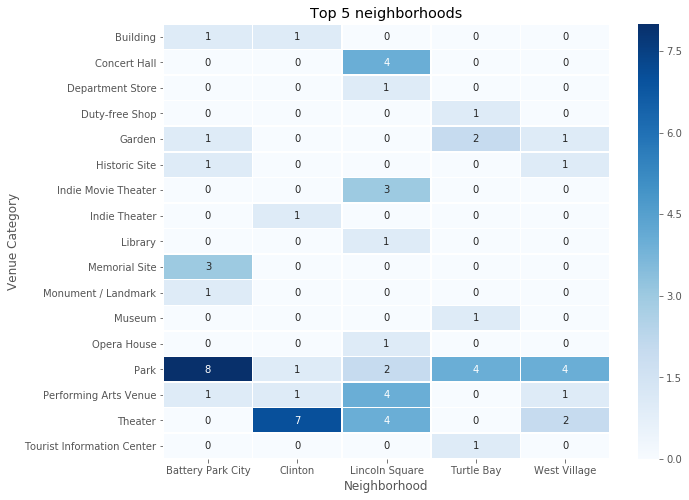

In [74]:
# This dataset is now in a clear format to be dispalyed as a heatmap
#fig_dims = (50, 15)
#sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.heatmap(df_top5, cmap='Blues', annot=True, fmt='d', linewidths=.5)
#sns.heatmap(df_top5, cmap=sns.diverging_palette(256,0,sep=80, n=7, as_cmap=True), annot=True, fmt='d')
# We can choose our own 'center' for our colormap
#sns.heatmap(df_top5,center=df_top5.loc['Library','Lincoln Square'])
plt.title('Top 5 neighborhoods')
plt.show()

In [75]:
Top_Venues = Top_Venues.sort_values(by=['Neighborhood'])

Let's create the **barchart and heatmap** for subplots up and down to see the numbers of venues and venue categories.

Let's pay attention to **Lincoln Square and Clinton**.

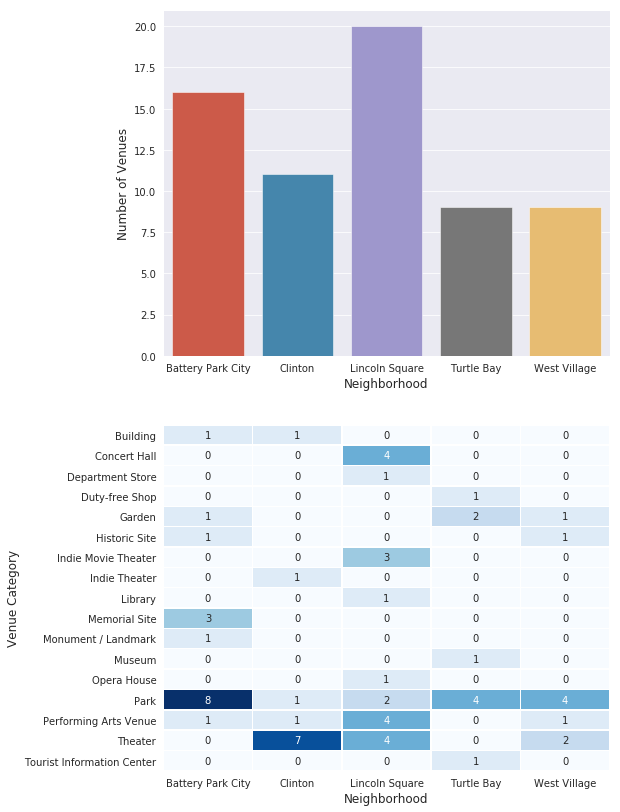

In [76]:
# heatmap() can be used on an axes for a subplot to create more informative figures
#plt.figure(figsize=(10, 8))
sns.set_style('darkgrid')
fig, (axis1,axis2) = plt.subplots(2,1, figsize=(8,14))

#fig, (axis1,axis2) = plt.subplots(2,1,sharex =True)

# Create the bar plot on top
#plt.figure(figsize=(10, 8))
sns.barplot('Neighborhood', y='Number of Venues',data=Top_Venues, ax = axis1)

# Create the heatmap on bottom
#plt.figure(figsize=(10, 8))
#sns.heatmap(df_top5, cmap='Blues', annot=True, fmt='d', linewidths=.5, ax=axis2, cbar_kws={"orientation": "horizontal"})
sns.heatmap(df_top5, cmap='Blues', annot=True, fmt='d', linewidths=.5, cbar=False, ax=axis2)
plt.show()

Let's create **implot and regplot** to see trend of total visitors and domestic and international seperately.

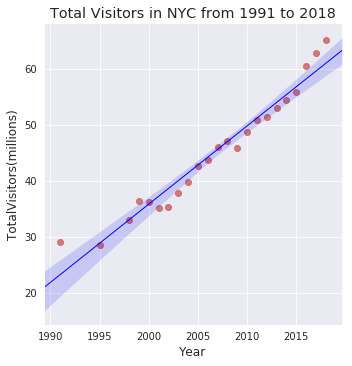

In [77]:
# Let's use lmplot() to plot TotalVisitors(millions) by year
#sns.lmplot("Year","TotalVisitors(millions)",df_visitor)
sns.lmplot("Year","TotalVisitors(millions)",df_visitor,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"});
plt.title('Total Visitors in NYC from 1991 to 2018')
plt.show()

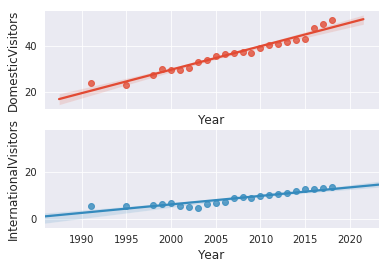

In [78]:
# reg_plot can be added to existing axes without modifying anything in the figure

# Create figure with 2 subplots
fig, (axis1,axis2) = plt.subplots(2,1,sharex =True)
#plt.title('Visitors in NYC from 1991 to 2018')
sns.regplot("Year","DomesticVisitors",df_visitor,ax=axis1)
sns.regplot("Year","InternationalVisitors",df_visitor,ax=axis2)

plt.show()

Let's create **scatterplot** to visualize the weight for vistors' size.

In [79]:
norm_dom = (df_visitor['DomesticVisitors'] - df_visitor['DomesticVisitors'].min()) / (df_visitor['DomesticVisitors'].max() - df_visitor['DomesticVisitors'].min())
norm_int = (df_visitor['InternationalVisitors'] - df_visitor['InternationalVisitors'].min()) / (df_visitor['InternationalVisitors'].max() - df_visitor['InternationalVisitors'].min())

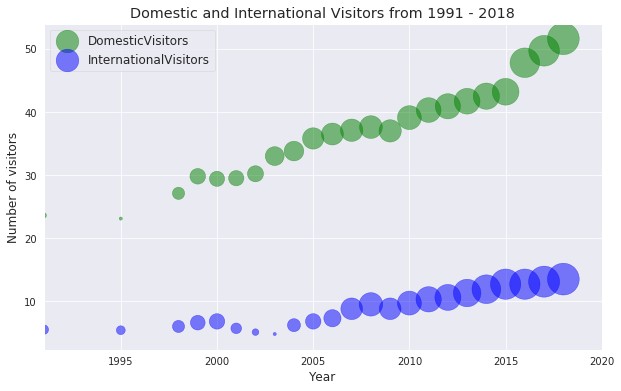

In [80]:
ax0 = df_visitor.plot(kind='scatter',
                    x='Year',
                    y='DomesticVisitors',
                    figsize=(10, 6),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_dom * 1000 + 10,  # pass in weights 
                    xlim=(1991, 2020)
                   )


ax1 = df_visitor.plot(kind='scatter',
                    x='Year',
                    y='InternationalVisitors',
                    alpha=0.5,
                    color="blue",
                    s=norm_int * 1000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of visitors')
ax0.set_title('Domestic and International Visitors from 1991 - 2018')
ax0.legend(['DomesticVisitors', 'InternationalVisitors'], loc='upper left', fontsize='large')

Let's create dataframe for percent change year over year on visitors.

In [81]:
df_visitor_pct_chg = df_visitor.set_index('Year')
df_visitor_pct_chg = df_visitor_pct_chg.pct_change()
df_visitor_pct_chg.tail()
df_visitor_pct_chg[df_visitor_pct_chg['InternationalVisitors'] > 0.2]

,TotalVisitors(millions),DomesticVisitors,InternationalVisitors,TotalVisitorSpendingBillions(US$)
Year,,,,
2004.0,0.055556,0.024242,0.291667,0.151351
2007.0,0.050228,0.016438,0.205479,0.145038


In [82]:
#9/11 and financial crisis - having minus percent change on year by year
df_visitor_pct_chg.loc[2000.0:2015.0, :]

,TotalVisitors(millions),DomesticVisitors,InternationalVisitors,TotalVisitorSpendingBillions(US$)
Year,,,,
2000.0,-0.005495,-0.013423,0.030303,0.089744
2001.0,-0.027624,0.003401,-0.161765,-0.111765
2002.0,0.002841,0.023729,-0.105263,-0.066225
2003.0,0.070822,0.092715,-0.058824,0.312057
2004.0,0.055556,0.024242,0.291667,0.151351
2005.0,0.067669,0.059172,0.096774,0.140845
2006.0,0.028169,0.019553,0.073529,0.078189
2007.0,0.050228,0.016438,0.205479,0.145038
2008.0,0.023913,0.013477,0.079545,0.066667


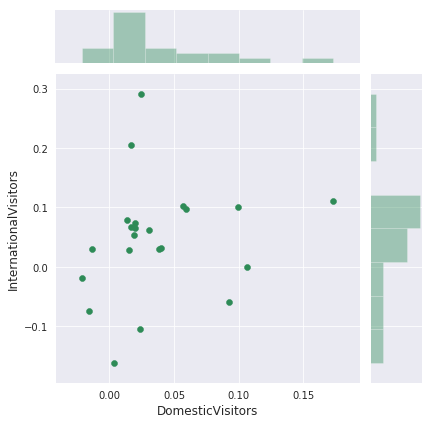

In [83]:
#plt.title('Yr over Yr %change of Visitors')
sns.jointplot('DomesticVisitors','InternationalVisitors',df_visitor_pct_chg,kind='scatter',color='seagreen')
plt.show()

Let's pay attention percentage changes on international changes after **9/11 and financial crisis**.

Huge changes are expected after big events like 9/11 and financial crisis.

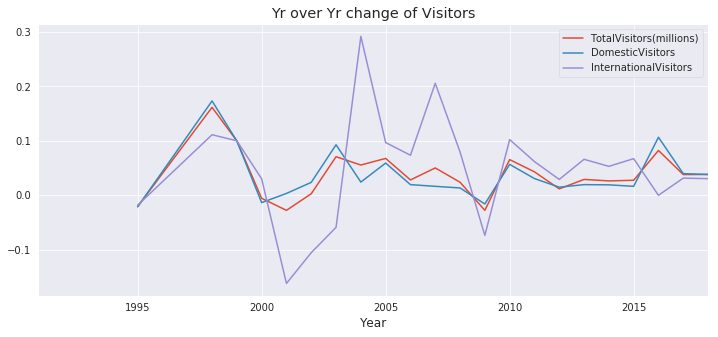

In [84]:
df_visitor_pct_chg[['TotalVisitors(millions)','DomesticVisitors','InternationalVisitors']].plot(subplots=False,figsize=(12,5))
plt.title('Yr over Yr change of Visitors')
plt.show()

Let's predict number of vistors for next 5 years using **linear regression** model.

In [85]:
X = df_visitor[['Year']]
y = df_visitor[['TotalVisitors(millions)']]

Splitting the dataset into the Training set and Test set

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Training the Simple Linear Regression model on the Training set

In [87]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1.33741868]]
Intercept:  [-2638.90219563]


Predicting the Test set results

In [88]:
y_pred = regr.predict(X_test)
y_pred_train = regr.predict(X_train)

Visualising the Training set results

Text(0, 0.5, 'TotalVisitors(millions)')

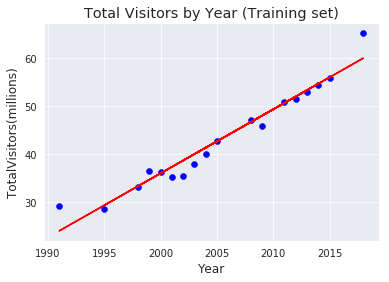

In [89]:
plt.scatter(X_train, y_train,  color='blue')
#plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.plot(X_train, regr.predict(X_train), '-r')
plt.title('Total Visitors by Year (Training set)')
plt.xlabel("Year")
plt.ylabel("TotalVisitors(millions)")

Visualising the Test set results

Text(0, 0.5, 'TotalVisitors(millions)')

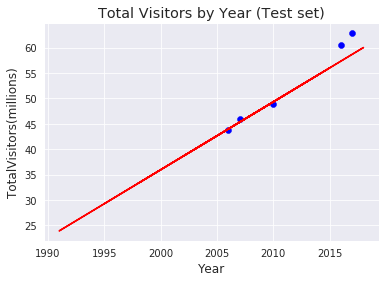

In [90]:
plt.scatter(X_test, y_test,  color='blue')
#plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.plot(X_train, regr.predict(X_train), '-r')
plt.title('Total Visitors by Year (Test set)')
plt.xlabel("Year")
plt.ylabel("TotalVisitors(millions)")

we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

R-squared is not error, but is a popular metric for accuracy of the model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits the data.

It is pretty good with R2-score = 0.85.

In [91]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 1.73
Residual sum of squares (MSE): 5.57
R2-score: 0.85


It looks like our mean square error between our training and testing was pretty close. Let's visualize with residual plot.

In [92]:
print("Fit a model X_train, and calculate MSE with y_train: %.2f"  % np.mean((y_pred_train - y_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and y_test: %.2f"  %np.mean((y_pred - y_test) ** 2))

Fit a model X_train, and calculate MSE with y_train: 4.73
Fit a model X_train, and calculate MSE with X_test and y_test: 5.57


In [93]:
y = 1.4*2020 - 2757
y

71.0

It may be interesting to check out the poit far from the line, but overall the majority of the residuals seem to be randomly allocated above and below the horizontal. We could also use seaborn to create these plots:

Text(0.5, 1.0, 'Residual Plots')

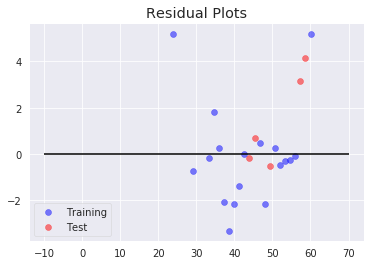

In [94]:
# Scatter plot the training data
train = plt.scatter(y_pred_train,(y_train-y_pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(y_pred,(y_test-y_pred),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=70)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

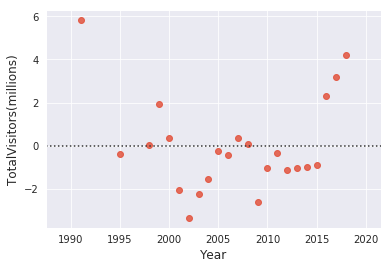

In [95]:
# Residual plot of all the dataset using seaborn
sns.residplot('Year', 'TotalVisitors(millions)', data = df_visitor)

In [96]:
X_test

,Year
11,2007.0
10,2006.0
21,2017.0
14,2010.0
20,2016.0


Based on the model we can expect ~69MM plus NYC population ~8.3MM. The tourist office target visitors can be ~78MM.

In [97]:
years_dict = {'year' : [2019, 2020, 2021, 2022, 2023, 2024, 2025]}
years = pd.DataFrame(years_dict)
years
test_yr = np.asanyarray(years)
years['pred_visitors'] = regr.predict(test_yr)
years

,year,pred_visitors
0,2019,61.346120
1,2020,62.683539
2,2021,64.020957
3,2022,65.358376
4,2023,66.695795
5,2024,68.033213
6,2025,69.370632


## Results and Discussion <a name="results"></a>

Our analysis shows that there is a great number of attractions tourists will visit in New York City, but foursquare data is not inclusive of all the attractions. As expected before the analysis, the clustering method provided the neighborhoods - Lincoln Square and Clinton neighborhoods as the location candidates.

**Clinton**, known as Hell's Kitchen, is a neighborhood on west of Midtown Manhattan, bordered by 34th Street to the south, 59th Street to the north, Eighth Avenue to the Hudson River, adjacent to top5 attractions below;

| Name                 |Visitors_millions|
| -------------------- | --------------- |
|Central Park          |42.0             |
|Times Square          |39.5             |
|Grand Central Terminal|21.6             |
|Theater District      |13.0             |
|Rockfella Center      |12.8             |
|Bryant Park           |12.0             |

Also perfect place to find Airbnb with the right price and enjoy bars and clubs at night.

On the contrary, **Lincoln Square** is the home of Lincoln Center, a performing-arts venue with 30 indoor and outdoor performance facilities including:

* Metropolitan Opera House
* David Geffen Hall
* David H. Koch Theater
* Alice Tully Hall
* Vivian Beaumont Theater

Lincoln Center houses nationally and internationally renowned performing arts organizations including:

* The Chamber Music Society of Lincoln Center
* Film Society of Lincoln Center (sponsor of the New York Film Festival)
* Jazz at Lincoln Center
* Juilliard School
* Lincoln Center for the Performing Arts
* Lincoln Center Theater
* Metropolitan Opera
* New York City Ballet
* New York City Opera
* New York Philharmonic
* New York Public Library for the Performing Arts
* School of American Ballet
* Lincoln Center Education

This neighborhood is the surrounding neighborhood centered on the intersection of Broadway and Columbus Avenue, between West 65th and West 66th streets. It is bounded by Hell's Kitchen and Central Park.

Perfect place to experience music concert, opera, performing art and stroll Central Park with Natural history museum near by. 

Lincoln Square doesn't have popular venues among top 19 attractions having more than 2MM visitors, however, it has different venues in Lincoln Center complex and more art and cultural tourist destination.

## Conclusion <a name="conclusion"></a>

This purpose of this project was to find the best location for the **office** building closer the tourist attractions having higher numbers of attraction venues where tourist might visit in order to help stakeholders make better decision in narrowing down the search for optimal location for the tourism office.

By finding the silimarity with clustering from Foursquare data we have identified neighborhood candidates that required further analysis (Lincoln Square, Clinton and other 3 additional neighborhoods), and generated venues' list. Additionally, data visualization was then performed in order to find the patterns.

Final decission on optimal location will be made by stakeholders based on specific characteristics of neighborhoods and locations in the two recommended neighborhoods - **Clinton and Lincoln Square**, taking into consideration additional factors like attractiveness of each location-**real estate availability, prices, social and economic** dynamics of neighborhood etc.